# Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
first = np.array([6.5,4.1,6.4,3.7,1.6,2.2,8.2,8.7,6.8,3.0,1.7,2.0,4.1,3.6,3.1,8.4,6.2,7.3,7.5,3.3,6.9,3.0,9.1,7.1,6.7,6.7,4.0,3.4,2.8,7.7,8.6,9.4,6.2,8.4,3.3,7.2,1.8,3.5,4.0,3.0,7.5,6.3,4.1,8.1,7.9,2.3,3.2,3.4,3.3,2.6])
second = np.array([8.6,3.1,6.4,4.9,2.4,2.7,7.3,6.2,6.6,4.6,3.5,3.4,3.1,3.7,4.9,8.1,7.9,7.2,6.7,4.5,7.2,1.6,8.3,9.0,6.2,8.5,5.7,3.5,3.2,8.1,6.9,7.4,5.7,6.2,2.6,8.3,3.0,4.7,3.5,3.5,8.3,8.6,4.3,7.1,7.9,4.0,4.2,3.6,6.5,2.3])
score = np.array([0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1])

df = pd.DataFrame({'first': first, 'second': second, 'score': score})
df.head()

,first,second,score
0,6.5,8.6,0
1,4.1,3.1,1
2,6.4,6.4,0
3,3.7,4.9,1
4,1.6,2.4,1


## Classes

<Axes: xlabel='first', ylabel='second'>

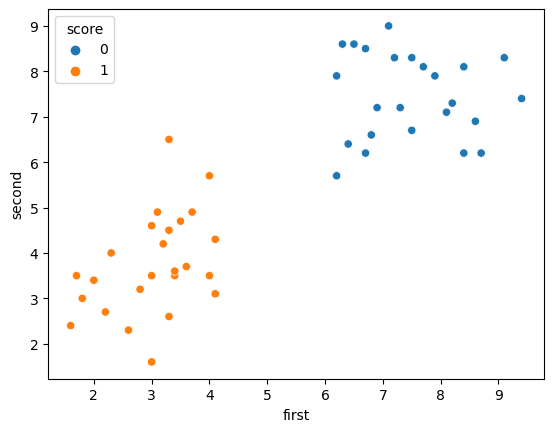

In [3]:
sns.scatterplot(data=df, x='first', y='second', hue='score')

## Separating Hyperplane

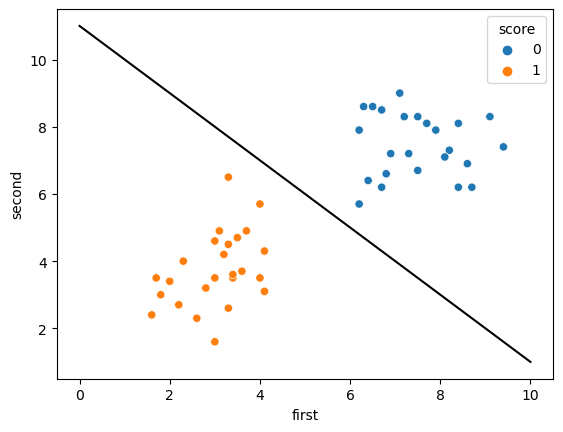

In [4]:
sns.scatterplot(data=df, x='first', y='second', hue='score')

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m * x + b
plt.plot(x, y, 'black')

## Support Vector Machine

Exploring the algortihm and finding what is the best separating line

In [5]:
from sklearn.svm import SVC # Support Vector Classifier

In [6]:
X = df.drop('score', axis=1)
y = df['score']

In [7]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [8]:
# our custom python file
from svm_margin_plot import plot_svm_boundary

C:\Users\Biser\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


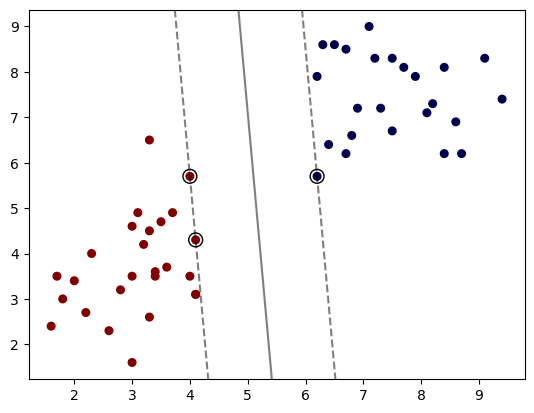

In [9]:
plot_svm_boundary(model, X, y)

## Hyper Parameters

#### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

Let's see the things will look like with much smaller value for C

In [10]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

C:\Users\Biser\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


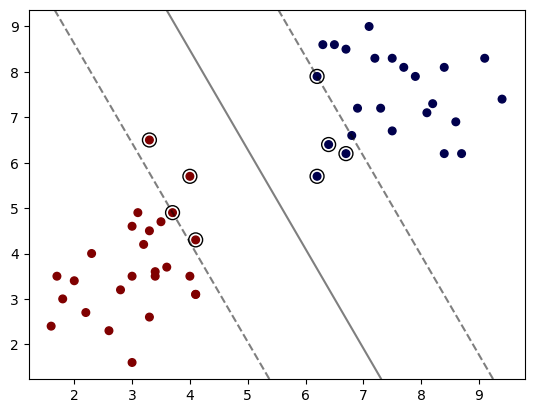

In [11]:
plot_svm_boundary(model, X, y)

### rbf kernel

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

C:\Users\Biser\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


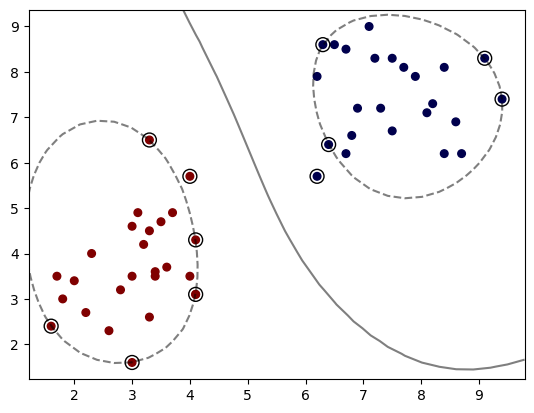

In [12]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\Biser\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


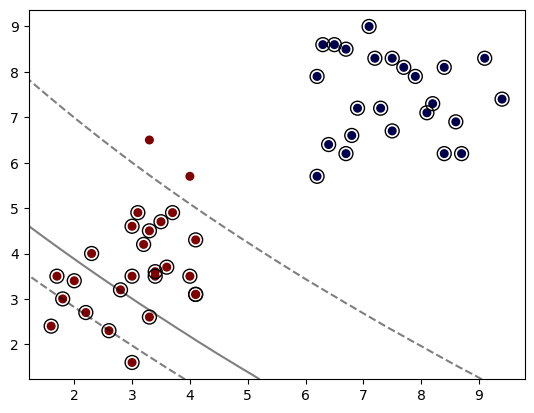

In [13]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\Biser\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


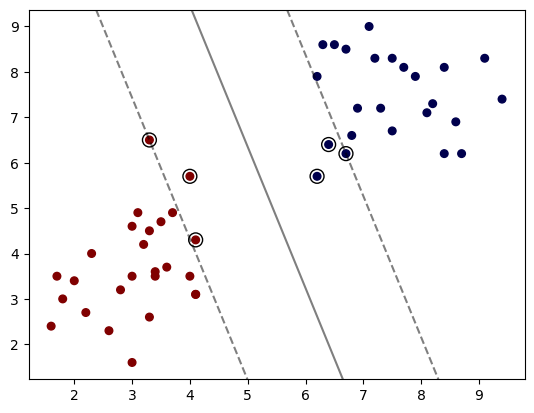

In [14]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\Biser\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


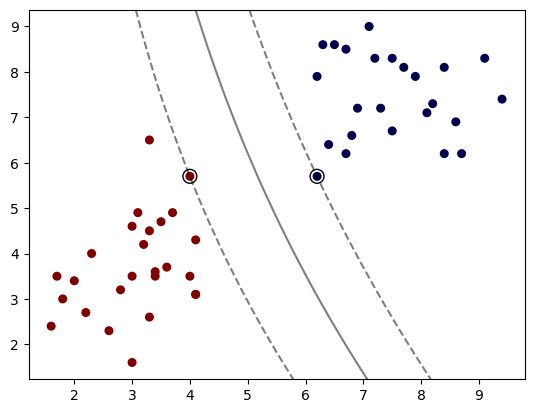

In [15]:
model = SVC(kernel='poly', C=1, degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\Biser\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


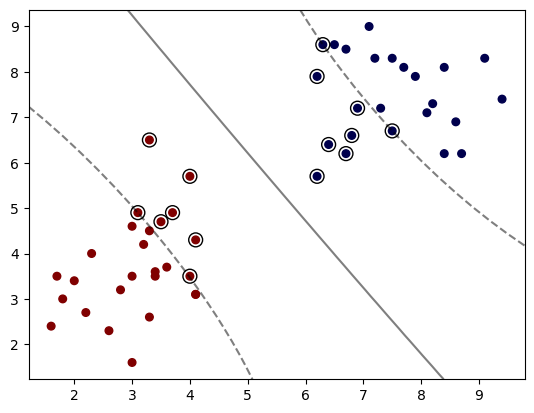

In [16]:
model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model, X, y)

## Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf']}
grid = GridSearchCV(svm, param_grid)

In [19]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [20]:
grid.best_score_

1.0

In [21]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}